In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

/tmp/ipykernel_881/3986292583.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [27]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)

    
    if N == 1:
        return x
    else:
        print(x)
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        
        # print("X_even", X_even)
        # print("factor", factor[:int(N/2)])
        # print("X_odd", X_odd)
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])

        print("answer", x,X)
        # print()
        # print(X)
        # print()
        return X

In [17]:
print(np.pi*1/128)
print(-2j*np.pi*1/128)
print(np.exp(-2j*np.pi*1/ 128))


0.02454369260617026
-0.04908738521234052j
(0.9987954562051724-0.049067674327418015j)


In [30]:
print(np.arange(5)[1::2])
print(np.concatenate([np.arange(5)[::2],np.arange(5)[1::2]]))

[1 3]
[0 2 4 1 3]


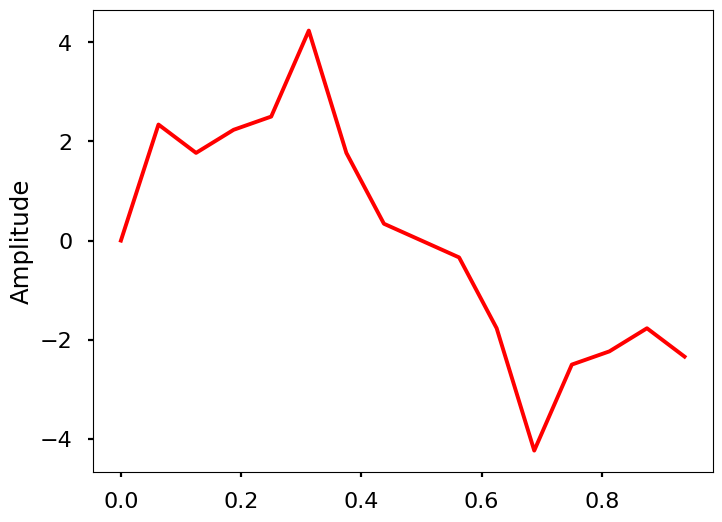

In [32]:
# sampling rate
sr = 16
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()


In [18]:
print(x)

[ 0.000000e+00  2.500000e+00  3.061617e-16 -2.500000e+00]


[ 0.00000000e+00  2.33939201e+00  1.76776695e+00  2.23357836e+00
  2.50000000e+00  4.23357836e+00  1.76776695e+00  3.39392013e-01
  3.06161700e-16 -3.39392013e-01 -1.76776695e+00 -4.23357836e+00
 -2.50000000e+00 -2.23357836e+00 -1.76776695e+00 -2.33939201e+00]
[ 0.00000000e+00  1.76776695e+00  2.50000000e+00  1.76776695e+00
  3.06161700e-16 -1.76776695e+00 -2.50000000e+00 -1.76776695e+00]
[ 0.000000e+00  2.500000e+00  3.061617e-16 -2.500000e+00]
[0.000000e+00 3.061617e-16]
answer [0.000000e+00 3.061617e-16] [ 3.061617e-16+0.00000000e+00j -3.061617e-16-3.74939946e-32j]
[ 2.5 -2.5]
answer [ 2.5 -2.5] [-1.33226763e-15+0.000000e+00j  5.00000000e+00+3.061617e-16j]
answer [ 0.000000e+00  2.500000e+00  3.061617e-16 -2.500000e+00] [-1.02610593e-15+0.00000000e+00j  3.06161700e-16-5.00000000e+00j
  1.63842933e-15+1.63155729e-31j -1.53080850e-15+5.00000000e+00j]
[ 1.76776695  1.76776695 -1.76776695 -1.76776695]
[ 1.76776695 -1.76776695]
answer [ 1.76776695 -1.76776695] [8.88178420e-16+0.00000000e

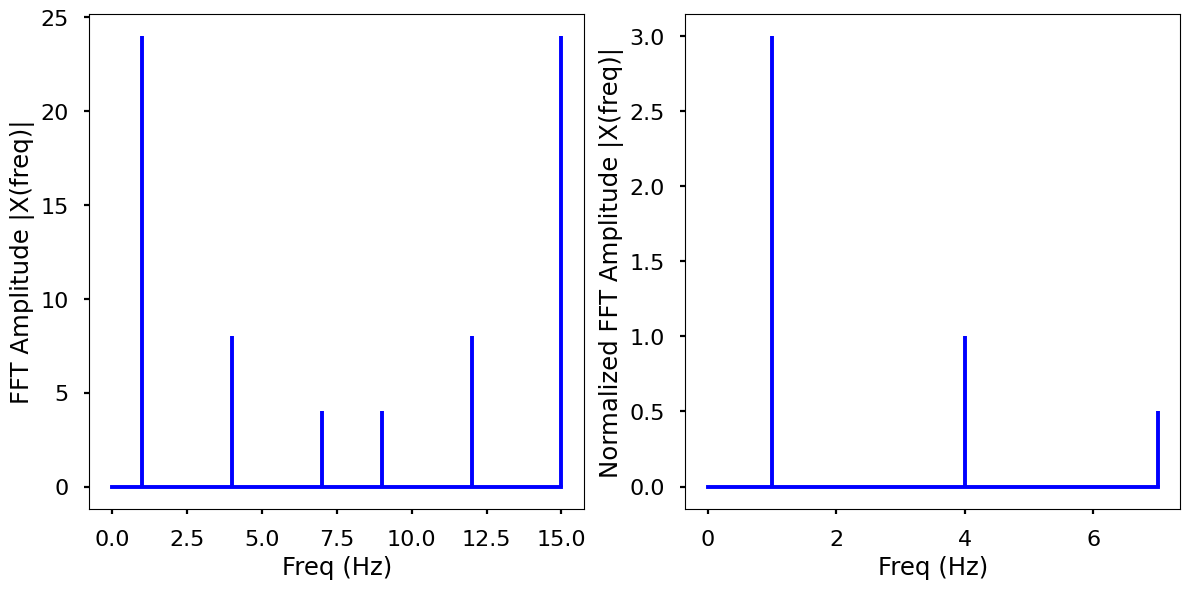

In [42]:
X=FFT(x)

print(X)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside


print(abs(X_oneside))
print(f_oneside)

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()
